# Car price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data = pd.read_csv("car data.csv")

In [33]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [34]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [35]:
df = data.copy()

In [36]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [37]:
df.drop('Car_Name', axis=1, inplace=True)

In [38]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Lets add column for current year and then taking difference between currern year and year to check number of years.

In [39]:
df['Current_Year']=2020
df['Number_of_Years']=df['Current_Year']-df['Year']
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Number_of_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


Now there is no need of columns Year and Current year so we can drop both columns

In [40]:
df.drop({'Year','Current_Year'}, axis=1, inplace=True)

In [41]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


Unique Values

In [42]:
print('Unique Values:-')
print('Fuel_Type : ', data.Fuel_Type.unique())
print('Seller_Type : ', data.Seller_Type.unique())
print('Transmission : ', data.Transmission.unique())
print('Owner : ', data.Owner.unique())

Unique Values:-
Fuel_Type :  ['Petrol' 'Diesel' 'CNG']
Seller_Type :  ['Dealer' 'Individual']
Transmission :  ['Manual' 'Automatic']
Owner :  [0 1 3]


In [43]:
df=pd.get_dummies(df, drop_first=True)

In [44]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [45]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Number_of_Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


Lets Check for the Feature Extraction

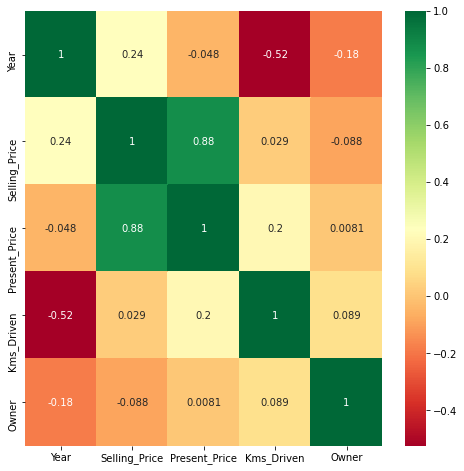

In [56]:
datacorr = data.corr()
top_corr_features=datacorr.index
plt.figure(figsize=(8,8))
#Plot the heatmap
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [60]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [61]:
x.head()

,Present_Price,Kms_Driven,Owner,Number_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [62]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [63]:
from sklearn.ensemble import ExtraTreesRegressor

In [64]:
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [67]:
print(model.feature_importances_)

[0.34793511 0.04087101 0.00052379 0.07357448 0.25903334 0.00341578
 0.12144529 0.1532012 ]


Lets plot graph for better visualization

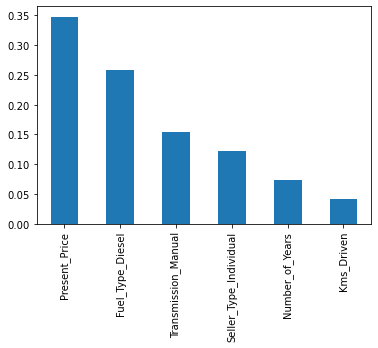

In [70]:
Important_Feature=pd.Series(model.feature_importances_, index=x.columns)
Important_Feature.nlargest(6).plot(kind='bar')
plt.show()

From above graph we can see that Present_Price in mot important feature

Now lets split data into train and test

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
xtr, xts, ytr, yts = train_test_split(x,y, test_size=0.30, random_state=0)

In [73]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()

RandomForestRegressor()

In [80]:
n_estimator=[int(x) for x in np.linspace(start=100, stop=1200, num=12 )]
print(n_estimator)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [81]:
from sklearn.model_selection import RandomizedSearchCV

Randomized Search CV

In [119]:
#No. of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
#no. of feature consider at every split
max_features  = ['auto','sqrt']
#Maximum no. of level in trees
max_depth =[int(x) for x in np.linspace(start=5, stop=35, num=7)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [120]:
# Create the random grid
random_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30, 35], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [121]:
rf = RandomForestRegressor()

In [122]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [123]:
rf_random.fit(xtr,ytr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=35 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=35, total=   2.9s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=35 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=35, total=   2.8s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=35 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=35, total=   2.4s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=35 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=35, total=   2.3s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=35 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=35, total=   2.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.0s
[CV] n_estimators=900, min_samples_spl

[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   3.7s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   3.6s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   3.8s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   4.4s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   4.0s
[CV] n_estimators=300, min_samples

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30,
                                                      35],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [124]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [125]:
rf_random.best_score_

-3.908824313758374

In [126]:
predictions=rf_random.predict(xts)

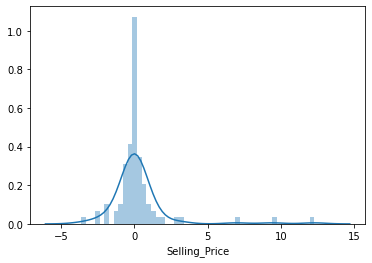

In [128]:
sns.distplot(yts-predictions)

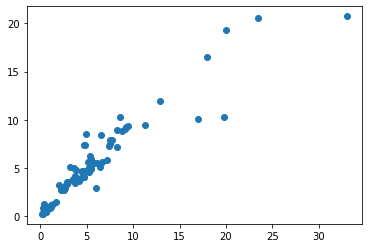

In [130]:
plt.scatter(yts,predictions)

In [131]:
from sklearn import metrics

In [133]:
print('MAE:', metrics.mean_absolute_error(yts, predictions))
print('MSE:', metrics.mean_squared_error(yts, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(yts, predictions)))

MAE: 0.8909443040293048
MSE: 4.040183478727867
RMSE: 2.0100207657454354


In [134]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')
pickle.dump(rf_random, file)